In [2]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

### _(a) Find a root, to four decimal places, of the cubic equation $x^3 + 2x^2 − 7x − 1 = 0$_

_by rearranging it into the form $x = f (x) = \frac17 (x^3 + 2x^2 − 1)$ and
making a first guess between −3 and 1. 
Iterating this function $f$ gives a sequence of real numbers. Do they get closer to one another?_

In [3]:
def cubic(x):
    return x**3 + 2*x**2 - 7*x - 1
def cubicprime(x):
    return 3*x**2 + 4*x - 7
def f(x):
    return (x**3 + 2 * x**2 - 1) / 7
def fprime(x):
    return (3*x**2 + 4*x)/7

In [4]:
'''
X is the array of start points.
zero_of is the function we are trying to find a root of
iter_with is the function which has the same fixed point as the root of zero_of
'''
def iterate(X, zero_of, iter_with):
    print(" x0 |      x_n        |       f(x)      |      cubic(x)    ")
    for x0 in X:
        sequence =[x0]
        x = x0
        c = 0
        while np.max(np.abs(zero_of(x))) > 1e-5:
            x=iter_with(x);
            sequence.append(x)
            c += 1
            if abs(zero_of(x)) > 1e5:
                # if control reaches here, our seq must be blowing up
                break
        print(x0, x, iter_with(x), zero_of(x), '\n')
        plt.plot(sequence, label=x0)
    plt.xlabel('$n$')
    plt.ylabel('$x_n$')
    plt.legend()

 x0 |      x_n        |       f(x)      |      cubic(x)    
-3.0 -0.13780532489598873 -0.1378051929093054 9.239067835231651e-07 

-2.5 -0.13780392440701647 -0.13780529179346118 -9.571705112954021e-06 

-2.0 -0.13780532906531037 -0.13780519261492127 9.5515272358071e-07 

-1.5 -0.1378053267127113 -0.1378051927810317 9.375217573381889e-07 

-1.0 -0.13780532906531037 -0.13780519261492127 9.5515272358071e-07 

-0.5 -0.13780418057588997 -0.1378052737062429 -7.651912470429956e-06 

0.0 -0.13780532906531037 -0.13780519261492127 9.5515272358071e-07 

0.5 -0.13780530868272636 -0.13780519405407834 8.024005362372577e-07 

1.0 -0.13780470030291717 -0.13780523700998284 -3.756949459643444e-06 



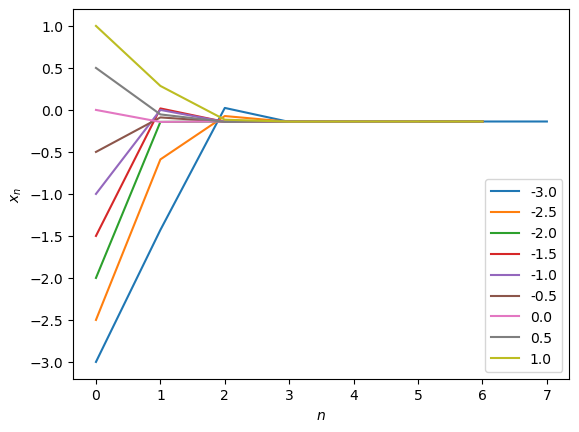

In [5]:
X = np.linspace(-3, 1, 9);
iterate(X, cubic, f)

In [6]:
approx_root = -0.13780;
print(cubic(approx_root), cubic(approx_root+1e-4), cubic(approx_root-1e-4))

-3.898215199993338e-05 -0.0007883896329998752 0.000710457060999925


#### We see that $x=-0.1378$ is the root between $-3$ and $1$, up to the first four digits.
#### As the plot above shows, the each sequence has elements getting closer to each other, since the jumps are getting smaller and smaller in amplitude from the left to the right.

### _(b) Repeat the above exercise but now use an initial guess of 2 or more._
_What happens in this case? Plot the cubic polynomial $x^3 + 2x^2 - 7x-1$ vs $x$ to explain the difference in behaviour._

 x0 |      x_n        |       f(x)      |      cubic(x)    
2.0 587.0250589985425 28996729.086833216 202972994.43241954 

3.0 46.62432319866722 15099.984515135206 105373.52134355577 

4.0 409.5718450645564 9862972.008512141 69037937.05666953 

5.0 2370.4893794252393 1904505646.797674 13331522934.158062 

6.0 10326.0 157319454075.2857 1101236106245.0 

7.0 62.857142857142854 36607.27072053311 255810.89504373175 

8.0 91.28571428571429 111050.92461474388 776717.4723032071 

9.0 127.14285714285714 298233.25989171176 2086742.8192419824 

10.0 171.28571428571428 726284.7438567262 5082794.2069970835 



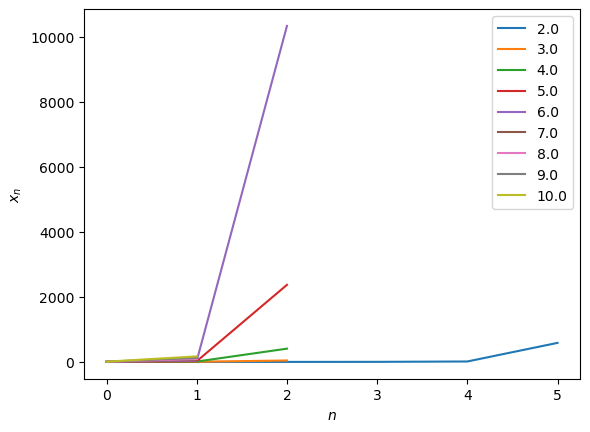

In [7]:
Y = np.linspace(2, 10, 9);
iterate(Y, cubic, f)

#### In this case we see that the sequence starts to blow up, at rates that are faster for larger initial values.
Please see the plot below.

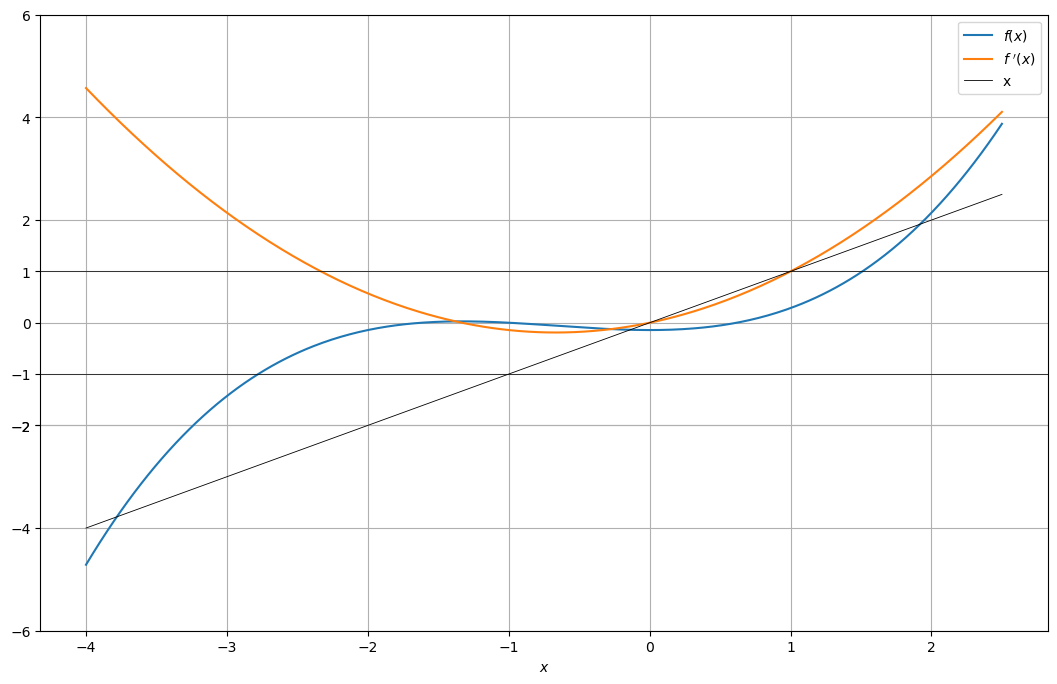

In [9]:
plt.figure(figsize=(13,8))

z = np.linspace(-4, 2.5, 400);
# plt.plot(z, cubic(z), label='$x^3 +2x^2-7x-1$')
# plt.plot(z, cubicprime(z), label="$3 X 2$")
plt.plot(z, f(z), label='$f(x)$')
plt.plot(z, fprime(z), label="$f\ '(x)$")
plt.plot(z, z, label='x', color='k', lw=0.6)

# Cosmetics
yt = plt.yticks()[0]
yt = np.append(yt, [-1,1, -2])
plt.yscale('linear')
plt.yticks(yt)
plt.axhline(y=-1, color='k', lw=0.5)
plt.axhline(y=1, color='k', lw=0.5)
plt.grid(visible=True)
plt.xlabel('$x$')
plt.legend()

In [ ]:
f(-3), f(1)

In [ ]:
z = np.linspace(-2, 0.5, 100);
np.max(np.abs(fprime(z)))

In [ ]:
f(-2), f(0.5)

#### Notice that $y=f$ and $y=x$ intersect before $x=-3$ and after $x=1$.
We see that \\[f([-3,1])\subset [-3,1].\\]
The metric space of real numbers is complete.
We have satisfied two hypotheses of the Banach contraction principle.

For $x\in[-2,0.5]$, we see that $-1 < -0.6 < f'(x) < 0.6 < 1$.
This implies that $f$ is a contraction on $[-2,0.5]$.

Closer inspection now reveals $f([-3,1]) \subset [-2, 0.5]$.
Also, $f[-2,0.5]\subset [-2,0.5]$, all the conditions of the theorem are satisfied:
1) $[-2,0.5]$ is a complete metric space.
2) $f$ maps this space to itself.
3) $f$ is a contraction on this space.

Hence we see that the iterates converge to the unique fixed point of $f$ in this space.

In fact, we see that there are two more fixed points of $f$: one around $-3.75$ and another just less than $2$.
Let us see whether this scheme converges to this same root when we begin inside this larger interval.

In [ ]:
from scipy.optimize import bisect
bisect(lambda x: f(x) - x, -4, -3)
# This gives us the fixed point of f lying in (-4,-3)

In [ ]:
X = np.linspace(-3.7813, -3.7812, 12);
iterate(X, cubic, f)

#### It's seems to be the case that this fixed point is indeed the lowest we can go and still converge.

In [ ]:
bisect(lambda x: f(x) -x, 1,2)

In [ ]:
X = np.linspace(1.919, 1.92, 12)
iterate(X, cubic, f)
# Notice how the sequences fail to converge as soon as x0 steps over 1.91908

#### And the same is happening on the other side: that fixed point is the highest we can go without diverging.

#### We have thus verified that this scheme converges to the root near $0$ iff the $x_0$ is between the two other unstable fixed points of $f$ on either sides of this root.

#### This is because $f'(x) > 0\implies f(x+\epsilon) > f(x)\forall \epsilon > 0$ and small.
Hence the sequence is increasing for any $x_0 = -0.1378+\epsilon$ and decreasing for any $x_0 = 1.9190 - \epsilon$.
Although $f'(x) < 0$ in a smaller interval inside $[-3,1]$, $f'(x_n) < 0\implies x_n\in[-3,1]$ and hence by the above reasoning it must converge.

When we choose a point outside the interval bounded by the two _unstable_ fixed points, we see that the reverse happens.
$f'(x_n) > 0 \implies f(x-\epsilon) < f(x)$ and the sequence diverges.

#### For $x\ge2$, $f(x)\ge2$, and in fact, $f$ is increasing on $[2, \infty)$, so the sequence blows up.

In [ ]:
def f2(x):
    return np.sqrt((0.5 * (-x**3 + 7*x + 1)))
def f2prime(x):
    return 0.25 * (-3 * x**2 + 7) / f2(x)
def discriminant(x):
    return 7*x + 1 - x**3

In [ ]:
print(bisect(discriminant, 2, 3), bisect(discriminant, -1, 0), bisect(discriminant, -3, -2))

#### These are the points where $-x^3 + 7x + 1 = 0$. We know it is goes to $+\infty$ as $x\to -\infty$ and becomes negative as $x\to +\infty$.
#### $\therefore f_2$ is only defined on $(-\infty, -2.5712] \cup [-0.1432, 2.71447]$ (approximately).

In [ ]:
Z = np.linspace(-0.1433, 2.72, 22)
iterate(Z, cubic, f2)

In [ ]:
z = np.linspace(-0.15, 2.75, 1000)
plt.plot(z, f2(z), label='$f_2$')
plt.plot(z, f2prime(z), label='$f_2\,\'$')
plt.plot(z, z, label='$y=x$', color='k', lw=0.5)
# Cosmetics
plt.yscale('symlog')
yt = plt.yticks()[0]
yt = np.append(yt, [-1,1])
plt.yticks(yt)
plt.axhline(y=-1, color='k', lw=0.5)
plt.axhline(y=1, color='k', lw=0.5)
plt.grid(visible=True)
plt.xlabel('$x$')
plt.legend()

#### A similar reasoning applies here.
The line $y=x$ intersects $y=f_2(x)$ in this interval.
So $f_2$ has a fixed point $x^*$, which we see is near $2$.

In [ ]:
bisect(f2prime, 1,2)

In [ ]:
f2(1.5275)

Also, from the above two lines we see on this interval $f_2$ is minimum on the endpoints, and $f_2\le 2.5$.
On the left side, $f_2(x) > x$, and on the right $f_2(x) < x.$
This means that $f_2$ maps this interval into approximately $[0, 2.1]$.

The line $y=x$ intersects the graph of $f_2$, so it has a fixed point $x^\ast$, which we see is near $2$.  
Looking at the graph of $f_2'(x)$, we see that it has modulus $<1$ between approximately $[0.5, 2.2]$.
Now $f_2([0.5, 2.2])$ is obviously bounded above by $2.016$, which is less that $2.2$.
It is bounded below by $1$, as clearly seen from the graph.

Thus $f_2$ is a contraction on $[0.5, 2.2]$ and so the iterates beginning from this interval converge to $x^\ast\approx 1.9$.

Outside this interval, on the left-hand side, the function is increasing, so it takes the sequence into the interval.
On the right, the function is decreasing, so the same thing happens.

### Left interval

Here, the function is positive until it hits zero on the right endpoint.
But the right endpoint is negative, so this interval has no fixed points.
Yet, a few points do actually converge.

In [ ]:
z = np.linspace(-10, -2.57, 1000)
plt.plot(z, f2(z), label='$f_2$')
plt.plot(z, f2prime(z), label='$f_2\,\'$')
plt.plot(z, z, label='$y=x$', color='k', lw=0.5)
# Cosmetics
plt.yscale('symlog')
yt = plt.yticks()[0]
yt = np.append(yt, [-1,1])
plt.yticks(yt)
plt.axhline(y=-1, color='k', lw=0.5)
plt.axhline(y=1, color='k', lw=0.5)
plt.grid(visible=True)
plt.xlabel('$x$')
plt.legend()

In [ ]:
X = np.linspace(-10, -2.57, 20)
iterate(X, cubic, f2)

#### This convergence is explained by the fact that $f_2(x_0)$ is always positive, and hence either falls in the earlier interval (which means it will converge), or falls out of its domain.